In [1]:
import json
import pandas as pd
from typing import Dict, Any
import sys

sys.path.append("/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src")
from robyn.modeling.feature_engineering import FeaturizedMMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs, Trial
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.enums import (
    DependentVarType,
    AdstockType,
    SaturationType,
    ProphetVariableType,
    PaidMediaSigns,
    OrganicSigns,
    ContextSigns,
    ProphetSigns,
    CalibrationScope,
)
from utils.data_mapper import export_data, import_data, save_data_to_json, load_data_from_json

## Load json data.
* InputCollect
* OutputModels
* outputsArgs

In [2]:
# Load data from JSON
loaded_data = load_data_from_json(
    "/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src/tutorials/data/R/exported_data.json"
)
imported_data = import_data(loaded_data)

In [3]:
# Display MMM Data
mmm_data = imported_data["mmm_data"]
display(mmm_data.data.head())

# Display Holidays Data
holidays_data = imported_data["holidays_data"]
display(holidays_data.dt_holidays.head())

# Display Hyperparameters
hyperparameters = imported_data["hyperparameters"]
print("Adstock Type:", hyperparameters.adstock)
print("Lambda:", hyperparameters.lambda_)
print("Train Size:", hyperparameters.train_size)

# Display Featurized MMM Data
featurized_mmm_data = imported_data["featurized_mmm_data"]
display(featurized_mmm_data.dt_mod.head())

# Display Model Outputs

model_outputs = imported_data["model_outputs"]

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.3467,0.0,12728.4889,2.430128e+07,0.0000,0.0000,8125009,7607.1329,na,19401.6538
1,2015-11-30,2.584277e+06,28613.4533,0.0,0.0000,5.527033e+06,9837.2385,4133.3333,7901549,1141.9525,na,14791.0000
2,2015-12-07,2.547387e+06,0.0000,132278.4,453.8667,1.665159e+07,12044.1197,3786.6667,8300197,4256.3754,na,14544.0000
3,2015-12-14,2.875220e+06,83450.3067,0.0,17680.0000,1.054977e+07,12268.0703,4253.3333,8122883,2800.4907,na,2800.0000
4,2015-12-21,2.215953e+06,0.0000,277336.0,0.0000,2.934090e+06,9467.2480,3613.3333,7105985,689.5826,na,15478.0000


,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


Adstock Type: AdstockType.GEOMETRIC
Lambda: 0.0
Train Size: (0.5, 0.8)


,ds,dep_var,trend,season,holiday,competitor_sales_B,events,tv_S,ooh_S,print_S,facebook_S,search_S,newsletter
0,2015-11-23,2.754372e+06,1.715453e+06,1.126434e+06,0.000000,8125009,0.0,22358.3467,0.0,12728.4889,7607.1329,0.0000,19401.6538
1,2015-11-30,2.584277e+06,1.716652e+06,9.012481e+05,0.000000,7901549,0.0,28613.4533,0.0,0.0000,1141.9525,4133.3333,14791.0000
2,2015-12-07,2.547387e+06,1.717850e+06,7.163430e+05,0.000000,8300197,0.0,0.0000,132278.4,453.8667,4256.3754,3786.6667,14544.0000
3,2015-12-14,2.875220e+06,1.719048e+06,6.931447e+05,0.000000,8122883,0.0,83450.3067,0.0,17680.0000,2800.4907,4253.3333,2800.0000
4,2015-12-21,2.215953e+06,1.720247e+06,7.855262e+05,512014.524528,7105985,0.0,0.0000,277336.0,0.0000,689.5826,3613.3333,15478.0000


In [4]:
print("After Prophet fitting Python data:")
print(featurized_mmm_data.dt_mod[["trend", "season", "holiday", "events"]].describe())

After Prophet fitting Python data:
              trend        season       holiday        events
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02
mean   1.773156e+06 -4.203883e+03  4.493476e+04  8.266517e+03
std    2.839524e+04  6.756344e+05  1.790962e+05  9.336189e+04
min    1.715453e+06 -1.050414e+06 -3.374564e+05  0.000000e+00
25%    1.749216e+06 -6.738250e+05  0.000000e+00  0.000000e+00
50%    1.774229e+06 -5.961828e+04  0.000000e+00  0.000000e+00
75%    1.798672e+06  6.468962e+05  0.000000e+00  0.000000e+00
max    1.815024e+06  1.218388e+06  1.055051e+06  1.272203e+06


In [11]:
featurized_mmm_data.dt_mod["events"].unique()

array([      0.        , 1272202.89877032,  447232.65809817])

In [5]:
# Assuming model_outputs.trials[0] is already an object from your model
trial = model_outputs.trials[0]


# Function to check if an object has a 'shape' attribute
def has_shape(obj):
    return hasattr(obj, "shape")


# Get all attribute names of the object and print their shapes if they have a 'shape' attribute
attribute_names = [attr for attr in dir(trial) if not callable(getattr(trial, attr)) and not attr.startswith("__")]
for attribute_name in attribute_names:
    attribute_value = getattr(trial, attribute_name)
    if has_shape(attribute_value):
        print(f"{attribute_name}: Shape = {attribute_value.shape}")
    else:
        print(f"{attribute_name}: No shape attribute, Type = {type(attribute_value).__name__}")

decomp_rssd: No shape attribute, Type = float
decomp_spend_dist: Shape = (10035, 34)
elapsed: No shape attribute, Type = float
elapsed_accum: No shape attribute, Type = float
iter_ng: No shape attribute, Type = int
iter_par: No shape attribute, Type = int
lambda_: No shape attribute, Type = float
lambda_hp: No shape attribute, Type = float
lambda_max: No shape attribute, Type = float
lambda_min_ratio: No shape attribute, Type = float
lift_calibration: Shape = (0, 0)
mape: No shape attribute, Type = int
nrmse: No shape attribute, Type = int
pos: No shape attribute, Type = int
result_hyp_param: Shape = (2007, 39)
rsq_test: No shape attribute, Type = float
rsq_train: No shape attribute, Type = float
rsq_val: No shape attribute, Type = float
sol_id: No shape attribute, Type = str
train_size: No shape attribute, Type = float
trial: No shape attribute, Type = int
x_decomp_agg: Shape = (24084, 29)


In [6]:
# Assuming model_outputs.trials[0] is already an object from your model
trial = model_outputs.trials[0]


# Function to check if an object has a 'shape' attribute
def has_shape(obj):
    return hasattr(obj, "shape")


# Get all attribute names of the object and print their shapes if they have a 'shape' attribute
attribute_names = [attr for attr in dir(trial) if not callable(getattr(trial, attr)) and not attr.startswith("__")]
for attribute_name in attribute_names:
    attribute_value = getattr(trial, attribute_name)
    if has_shape(attribute_value):
        print(f"{attribute_name}: Shape = {attribute_value.shape}")
        # Check if the attribute is a multi-dimensional array with more than one column
        if len(attribute_value.shape) > 1 and attribute_value.shape[1] > 1:
            try:
                # Attempt to print column names if it's a structured array or DataFrame
                columns = (
                    attribute_value.columns if hasattr(attribute_value, "columns") else attribute_value.dtype.names
                )
                print(f"  Columns: {columns}")
            except AttributeError:
                print("  No column names available.")
    else:
        print(f"{attribute_name}: No shape attribute, Type = {type(attribute_value).__name__}")

decomp_rssd: No shape attribute, Type = float
decomp_spend_dist: Shape = (10035, 34)
  Columns: Index(['rn', 'coef', 'xDecompAgg', 'xDecompPerc', 'xDecompMeanNon0',
       'xDecompMeanNon0Perc', 'xDecompAggRF', 'xDecompPercRF',
       'xDecompMeanNon0RF', 'xDecompMeanNon0PercRF', 'pos', 'mean_spend',
       'total_spend', 'spend_share', 'spend_share_refresh', 'effect_share',
       'effect_share_refresh', 'rsq_train', 'rsq_val', 'rsq_test',
       'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd',
       'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_ratio',
       'solID', 'trial', 'iterNG', 'iterPar'],
      dtype='object')
elapsed: No shape attribute, Type = float
elapsed_accum: No shape attribute, Type = float
iter_ng: No shape attribute, Type = int
iter_par: No shape attribute, Type = int
lambda_: No shape attribute, Type = float
lambda_hp: No shape attribute, Type = float
lambda_max: No shape attribute, Type = float
lambda_min_ratio: No shape attribute, T

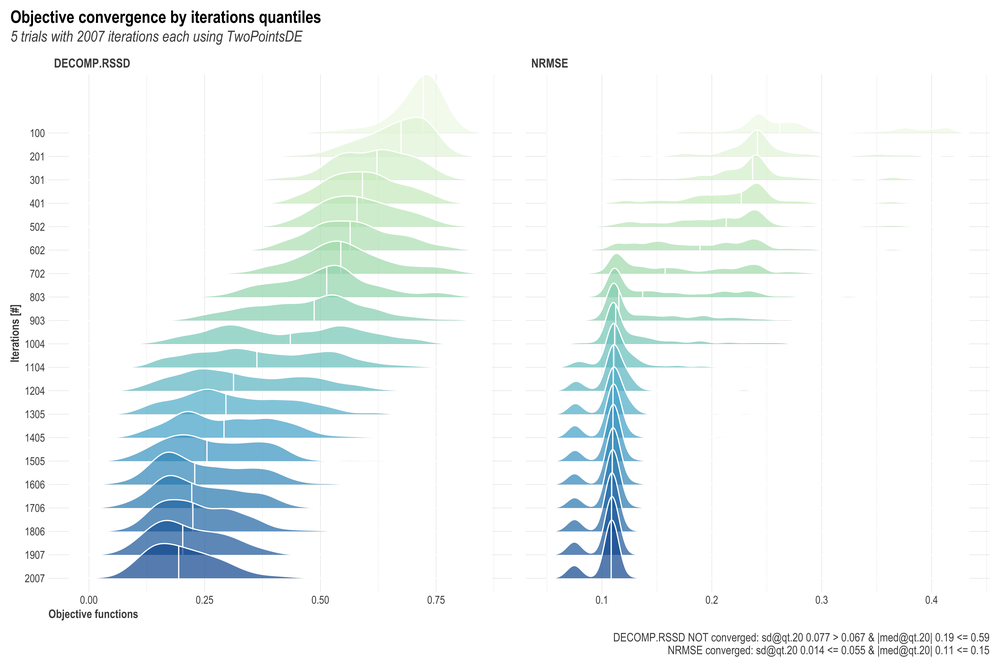

In [7]:
from utils.plot_utils import plot_outputgraphs

plot_outputgraphs(model_outputs, "moo_distrb_plot")

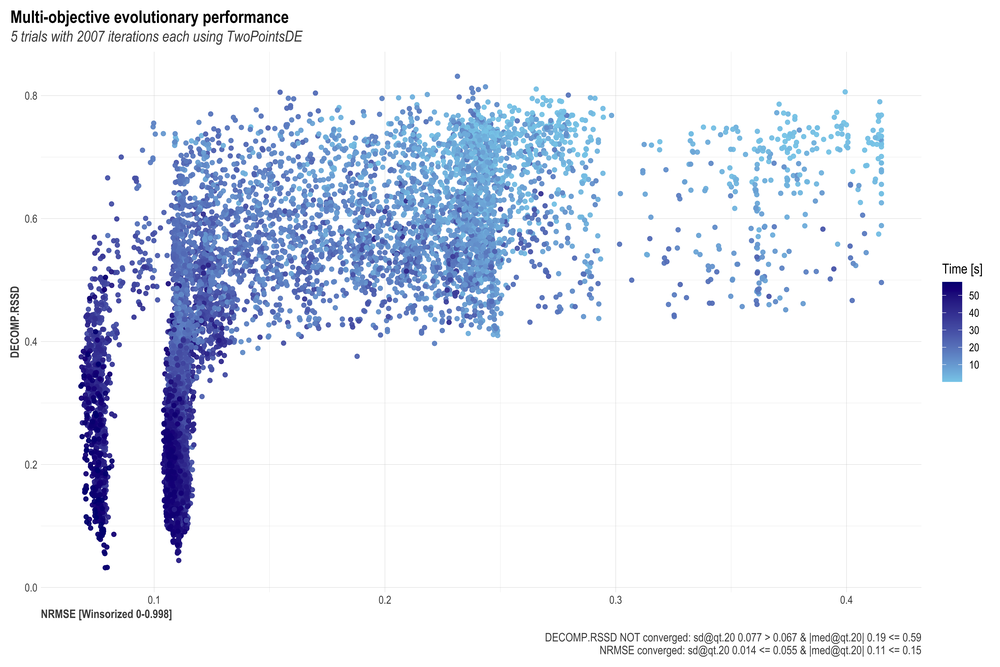

In [8]:
plot_outputgraphs(model_outputs, "moo_cloud_plot")

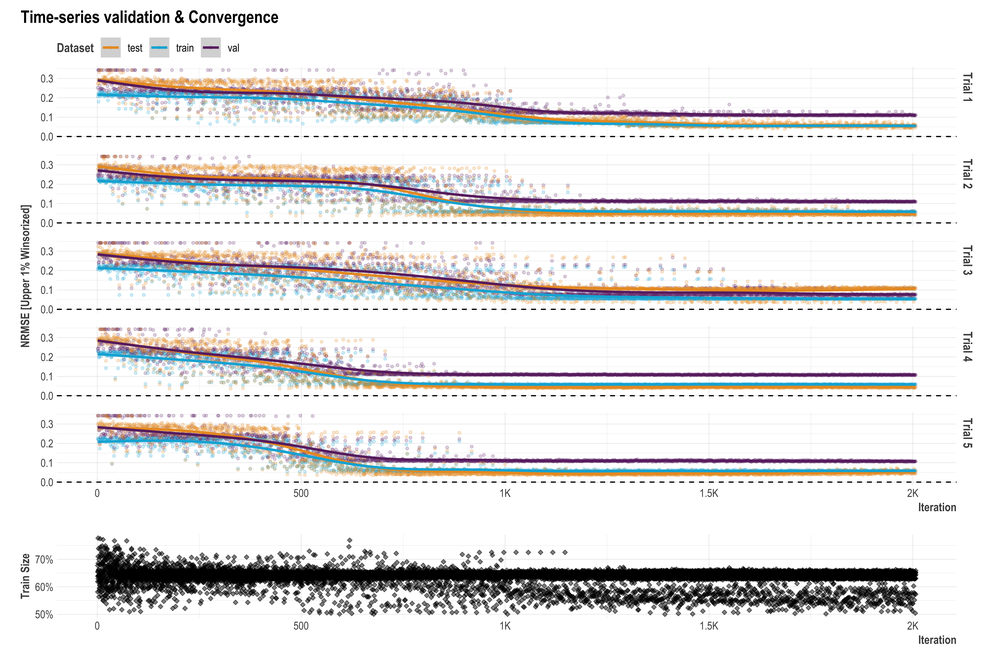

In [9]:
plot_outputgraphs(model_outputs, "ts_validation_plot")

In [10]:
from utils.data_mapper import export_data, import_data, save_data_to_json, load_data_from_json
from utils.compare_data import compare_featurized_mmm_data

# Load data from JSON
loaded_data = load_data_from_json(
    "/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src/tutorials/data/R/exported_data.json"
)
imported_data = import_data(loaded_data)

compare_featurized_mmm_data(
    "/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src/tutorials/data/R/exported_data.json",
    featurized_mmm_data,
)

('\ndt_mod DataFrame Comparison:\nShape Comparison:\n+---------+------------+--------------+\n|         |   R/Python |   New Python |\n+=========+============+==============+\n| Rows    |        208 |          208 |\n+---------+------------+--------------+\n| Columns |         13 |           13 |\n+---------+------------+--------------+\n\nColumn Comparison:\n+-------------------------------------------------------------------------------------------------------------------------+--------------------+----------------------+\n| Common Columns                                                                                                          | Only in R/Python   | Only in New Python   |\n+=========================================================================================================================+====================+======================+\n| competitor_sales_B, dep_var, ds, events, facebook_S, holiday, newsletter, ooh_S, print_S, search_S, season, trend, tv_S |        